<a href="https://colab.research.google.com/github/Chanda92/Data-Science-Projects/blob/master/BankNote%20Authentication%5CEDA%20and%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()
import io

Saving BankNoteAuthentication.csv to BankNoteAuthentication (1).csv


**Data Cleaning, Visualization and Preprocessing**

In [2]:
 # Read the dataset
df = pd.read_csv('BankNoteAuthentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
# Information about the dataset.
df.info

<bound method DataFrame.info of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [4]:
# The description of the dataset as all the features are numerical.

df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
# As we can see,there is no missing values in the workable dataset.

df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

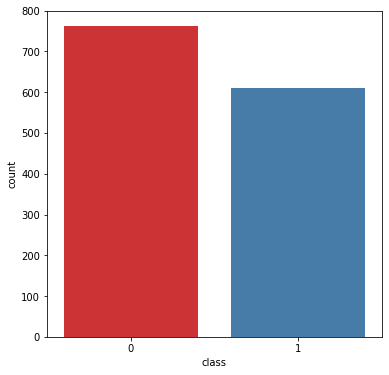

In [6]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.countplot(x=df['class'],palette='Set1')

In [7]:
count = df['class'].value_counts()
count

0    762
1    610
Name: class, dtype: int64

**As we can see, the distribution is equitable which means that there would be less bias in our model and we wouldn't have to give more weightage to input data in specific class feature.**

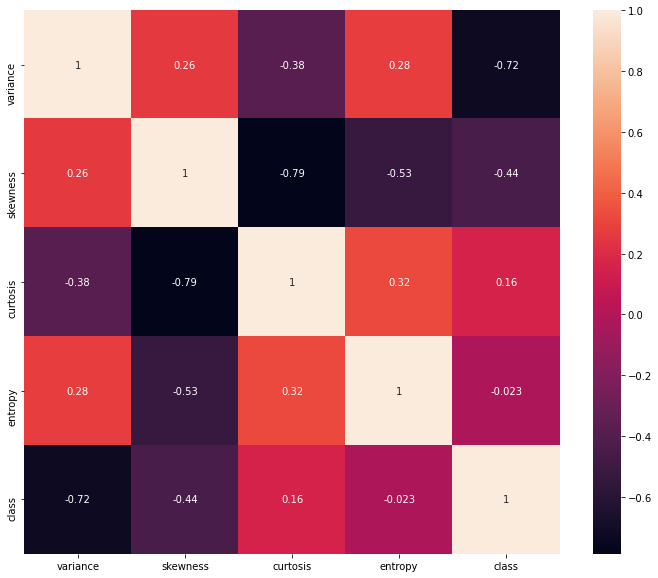

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see that Curtosis and skewness is highly correlated to each other and it is clearly seen that variance are highly correlated with class attribute.

<Figure size 432x432 with 0 Axes>

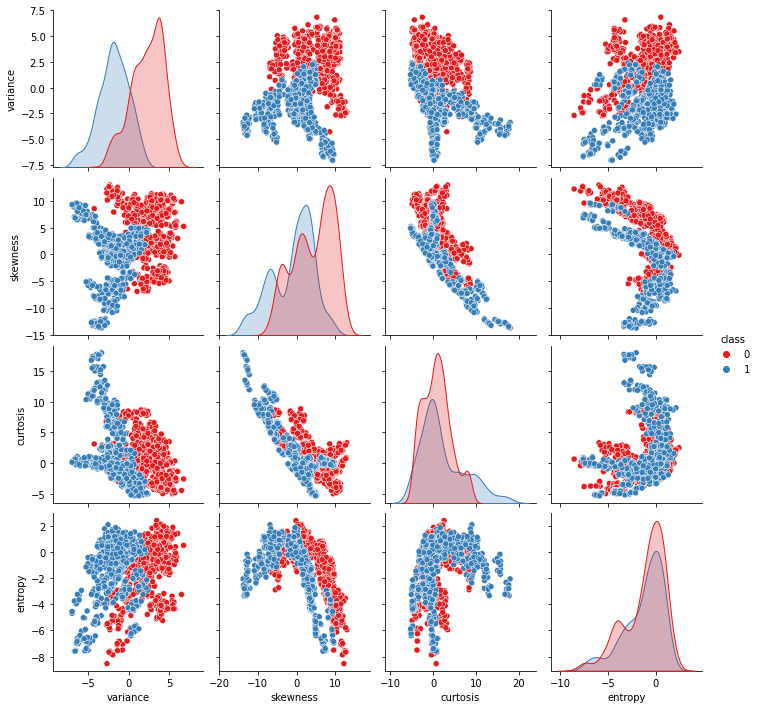

In [9]:
plt.figure(figsize=(6,6))
sns.pairplot(df,hue='class',palette='Set1')

In [10]:
x = df.drop('class',axis=1)
y= df['class']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

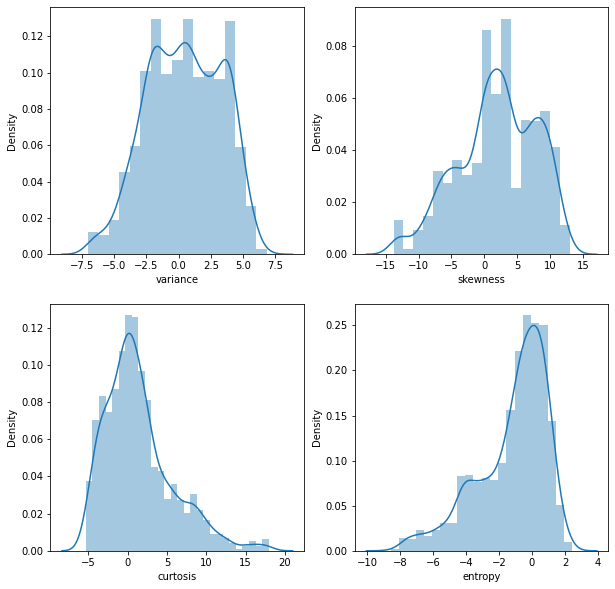

In [11]:
plt.figure(figsize=(10,10))
for i in range(len(x.columns)):
    plt.subplot(2, 2, i + 1 )
    sns.distplot(x[x.columns[i]])
plt.show()

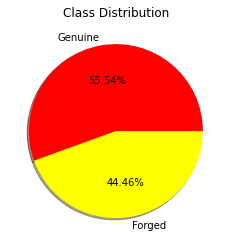

In [12]:
plt.figure(figsize=(4,4))
plt.pie(y.value_counts(), labels=['Genuine','Forged'],autopct='%.2f%%',colors=['Red','Yellow'],shadow='bool')
plt.title('Class Distribution')
plt.show()

# **Preprocessing**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, shuffle=True, random_state=1)
x_train

,variance,skewness,curtosis,entropy
694,0.74054,0.36625,2.199200,0.484030
880,-2.35180,-4.83590,6.647900,-0.060358
1251,-0.77688,0.13036,-0.031137,-0.353890
812,-2.06590,1.05120,-0.462980,-1.097400
1212,-2.45600,-0.24418,1.404100,-0.458630
...,...,...,...,...
715,3.49160,8.57090,-3.032600,-0.591820
905,0.74521,3.63570,-4.404400,-4.141400
1096,-4.36670,6.06920,0.572080,-5.466800
235,2.04660,2.03000,2.176100,-0.083634


In [14]:
x_train.mean()

variance    0.445566
skewness    1.967583
curtosis    1.274503
entropy    -1.167683
dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [16]:
x_train

,variance,skewness,curtosis,entropy
0,0.105279,-0.279831,0.225994,0.788028
1,-0.998406,-1.188899,1.313246,0.528302
2,-0.436302,-0.321052,-0.319095,0.388259
3,-0.896365,-0.160137,-0.424637,0.033532
4,-1.035596,-0.386502,0.031673,0.338288
...,...,...,...,...
955,1.087157,1.153920,-1.052646,0.274743
956,0.106946,0.291501,-1.387911,-1.418754
957,-1.717542,0.716752,-0.171671,-2.051099
958,0.571424,0.010907,0.220348,0.517197


In [17]:
y_train

694     0
880     1
1251    1
812     1
1212    1
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: class, Length: 960, dtype: int64

# **Modeling**

**1. Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Results**

In [19]:
score = model.score(x_test,y_test)
print("The Logistic Regression Test Accuracy Score: {:.2f}%".format((score) * 100))

The Logistic Regression Test Accuracy Score: 97.82%


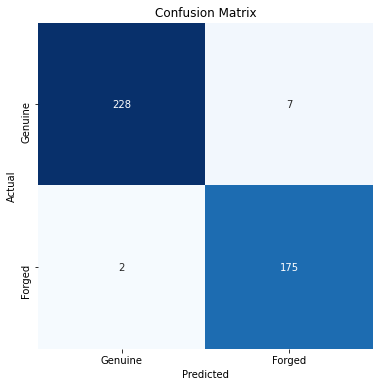

The Classification Report:
 .....................................................
               precision    recall  f1-score   support

     Genuine       0.99      0.97      0.98       235
      Forged       0.96      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
clr = classification_report(y_test,y_pred,target_names =['Genuine','Forged'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar= False)
plt.xticks(np.arange(2)+ 0.5, ['Genuine','Forged'])
plt.yticks(np.arange(2)+ 0.5, ['Genuine','Forged'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("The Classification Report:\n .....................................................\n", clr)

**2. Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Results

In [22]:
score = model.score(x_test,y_test)
print("The Random Forest Classifier have {:.2f}% Test Accuracy Score".format((score) * 100))

The Random Forest Classifier have 99.51% Test Accuracy Score


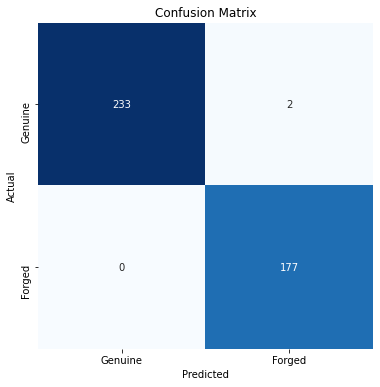

The Classification Report:
 .....................................................
               precision    recall  f1-score   support

     Genuine       1.00      0.99      1.00       235
      Forged       0.99      1.00      0.99       177

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
clr = classification_report(y_test,y_pred,target_names =['Genuine','Forged'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar= False)
plt.xticks(np.arange(2)+ 0.5, ['Genuine','Forged'])
plt.yticks(np.arange(2)+ 0.5, ['Genuine','Forged'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("The Classification Report:\n .....................................................\n", clr)